In [0]:
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import itertools

import keras
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from keras.models import Sequential
import itertools
from keras.layers.normalization import BatchNormalization
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import load_model
from keras import layers
from keras import Input
from keras.models import Model

from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [41]:
x_train_mean = np.mean(x_train)
x_train_std  = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean) / x_train_std


print(np.unique(y_train))
y_train = to_categorical(y_train)


x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.2, random_state = 1201)

[0 1 2 3 4 5 6 7 8 9]


In [43]:
x_test  = (x_test - x_train_mean) / x_train_std 
y_test = to_categorical(y_test)
y_test.shape

(10000, 10)

In [0]:
y_validate = to_categorical(y_validate)

In [42]:
y_validate.shape

(10000, 10)

In [44]:
input_layer = Input(shape = (32, 32, 3))

#model1: block1
block1_Conv1 =  layers.Conv2D(32, 3, activation = 'relu', padding = 'same')(input_layer)
block1_MPool1 = layers.MaxPooling2D(2)(block1_Conv1)
block1_Bn1 =    BatchNormalization()(block1_MPool1)

block1_Conv2 =  layers.Conv2D(128, 3, activation = 'relu', padding = 'same')(block1_Bn1)
block1_MPool2 = layers.MaxPooling2D(2)(block1_Conv2)
block1_Bn2 =    BatchNormalization()(block1_MPool2)

#inception block
tower_1 = Conv2D(64, (1,1), padding='same', activation='relu')(block1_Bn2)
tower_1 = Conv2D(64, (3,3), padding='same', activation='relu')(tower_1)
tower_2 = Conv2D(64, (1,1), padding='same', activation='relu')(block1_Bn2)
tower_2 = Conv2D(64, (5,5), padding='same', activation='relu')(tower_2)
tower_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(block1_Bn2)
tower_3 = Conv2D(64, (1,1), padding='same', activation='relu')(tower_3)
    
output_inception = keras.layers.concatenate([tower_1, tower_2, tower_3], axis = 3)

#dense block
dense1_dp1 =    Dropout(0.50)(output_inception)
dense1_flt =    layers.Flatten()(dense1_dp1)

dense1_dense1 = layers.Dense(512, activation = 'relu')(dense1_flt)
dense1_Bn1 =    BatchNormalization()(dense1_dense1)
dense1_dp2 =    Dropout(0.50)(dense1_Bn1)

output_layer = layers.Dense(10,activation = 'softmax')(dense1_dp2)

model2 = Model(inputs = input_layer, outputs = output_layer)
model2.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_22 (Conv2D)              (None, 32, 32, 32)   896         input_4[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_10 (MaxPooling2D) (None, 16, 16, 32)   0           conv2d_22[0][0]                  
__________________________________________________________________________________________________
batch_normalization_10 (BatchNo (None, 16, 16, 32)   128         max_pooling2d_10[0][0]           
____________________________________________________________________________________________

In [0]:
model2.compile(loss='categorical_crossentropy',
               optimizer= RMSprop(),
               metrics=['accuracy'])

In [7]:
y_train.shape

(40000, 10)

In [46]:
history2 = model2.fit(x_train, y_train,
           epochs=35,
           batch_size = 100,
           validation_data = (x_validate, y_validate),
           verbose = 1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/35
40000/40000 [==============================] - 11s 281us/step - loss: 1.4242 - accuracy: 0.5213 - val_loss: 1.2439 - val_accuracy: 0.5531
Epoch 2/35
40000/40000 [==============================] - 11s 265us/step - loss: 0.9380 - accuracy: 0.6740 - val_loss: 0.7873 - val_accuracy: 0.7271
Epoch 3/35
40000/40000 [==============================] - 11s 263us/step - loss: 0.7862 - accuracy: 0.7263 - val_loss: 0.7833 - val_accuracy: 0.7316
Epoch 4/35
40000/40000 [==============================] - 11s 264us/step - loss: 0.6921 - accuracy: 0.7574 - val_loss: 0.7313 - val_accuracy: 0.7534
Epoch 5/35
40000/40000 [==============================] - 10s 262us/step - loss: 0.6094 - accuracy: 0.7877 - val_loss: 0.7132 - val_accuracy: 0.7573
Epoch 6/35
40000/40000 [==============================] - 11s 264us/step - loss: 0.5529 - accuracy: 0.8062 - val_loss: 0.6643 - val_accuracy: 0.7772
Epoch 7/35
40000/40000 [==============================] 

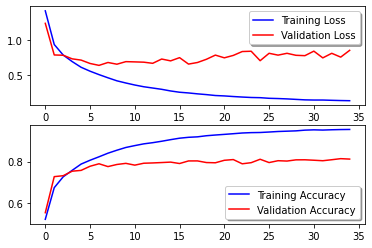

In [47]:
fig, axs = plt.subplots(2,1)
axs[0].plot(history2.history['loss'], color = 'b', label = "Training Loss")
axs[0].plot(history2.history['val_loss'], color = 'r', label = "Validation Loss", axes = axs[0])
legend = axs[0].legend(loc='best', shadow = True)

axs[1].plot(history2.history['accuracy'], color = 'b', label = "Training Accuracy")
axs[1].plot(history2.history['val_accuracy'], color = 'r', label = "Validation Accuracy")
legend = axs[1].legend(loc='best', shadow = True)

In [49]:
# after hyperparameter tuning
input_layer = Input(shape = (32, 32, 3))

#model1: block1
block1_Conv1 =  layers.Conv2D(32, 3, activation = 'relu', padding = 'same')(input_layer)
block1_MPool1 = layers.MaxPooling2D(2)(block1_Conv1)
block1_Bn1 =    BatchNormalization()(block1_MPool1)

block1_Conv2 =  layers.Conv2D(128, 3, activation = 'relu', padding = 'same')(block1_Bn1)
block1_MPool2 = layers.MaxPooling2D(2)(block1_Conv2)
block1_Bn2 =    BatchNormalization()(block1_MPool2)

#inception block
tower_1 = Conv2D(64, (1,1), padding='same', activation='relu')(block1_Bn2)
tower_1 = Conv2D(64, (3,3), padding='same', activation='relu')(tower_1)
tower_2 = Conv2D(64, (1,1), padding='same', activation='relu')(block1_Bn2)
tower_2 = Conv2D(64, (5,5), padding='same', activation='relu')(tower_2)
tower_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(block1_Bn2)
tower_3 = Conv2D(64, (1,1), padding='same', activation='relu')(tower_3)
    
output_inception = keras.layers.concatenate([tower_1, tower_2, tower_3], axis = 3)

#dense block
dense1_dp1 =    Dropout(0.50)(output_inception)
dense1_flt =    layers.Flatten()(dense1_dp1)

dense1_dense1 = layers.Dense(512, activation = 'relu')(dense1_flt)
dense1_Bn1 =    BatchNormalization()(dense1_dense1)
dense1_dp2 =    Dropout(0.50)(dense1_Bn1)

output_layer = layers.Dense(10,activation = 'softmax')(dense1_dp2)

model_inception= Model(inputs = input_layer, outputs = output_layer)
#model2.summary()
model_inception.compile(loss='categorical_crossentropy',
               optimizer= RMSprop(),
               metrics=['accuracy'])

history_inception= model_inception.fit(x_train, y_train,
           epochs=13,
           batch_size = 100,
           validation_data = (x_validate, y_validate),
           verbose = 1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/13
40000/40000 [==============================] - 11s 277us/step - loss: 1.4196 - accuracy: 0.5232 - val_loss: 1.0543 - val_accuracy: 0.6270
Epoch 2/13
40000/40000 [==============================] - 10s 262us/step - loss: 0.9411 - accuracy: 0.6678 - val_loss: 0.8111 - val_accuracy: 0.7198
Epoch 3/13
40000/40000 [==============================] - 11s 266us/step - loss: 0.7893 - accuracy: 0.7240 - val_loss: 0.7273 - val_accuracy: 0.7488
Epoch 4/13
40000/40000 [==============================] - 11s 264us/step - loss: 0.6880 - accuracy: 0.7586 - val_loss: 0.7412 - val_accuracy: 0.7460
Epoch 5/13
40000/40000 [==============================] - 11s 268us/step - loss: 0.6101 - accuracy: 0.7879 - val_loss: 0.7172 - val_accuracy: 0.7529
Epoch 6/13
40000/40000 [==============================] - 11s 266us/step - loss: 0.5529 - accuracy: 0.8061 - val_loss: 0.6878 - val_accuracy: 0.7693
Epoch 7/13
40000/40000 [==============================] 

10000/10000 [==============================] - 1s 149us/step
0.8118000030517578 0.854012246465683
10000/10000 [==============================] - 1s 145us/step
0.8104000091552734 0.870421659898758


In [51]:
test_loss, test_accuracy = model_inception.evaluate(x_test, y_test)
print (test_accuracy, test_loss)
model_inception.save('inception.h5')
model_loaded = load_model('inception.h5')

10000/10000 [==============================] - 1s 149us/step
0.7936999797821045 0.6680989986181259


(8000, 10, 2)